In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
secretnumber = '1101001'

In [3]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

for i, on_off in enumerate(reversed(secretnumber)):
    if on_off == '1':
        circuit.cx(i, len(secretnumber))

circuit.barrier()

circuit.h(range(len(secretnumber)))

circuit.barrier()

circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

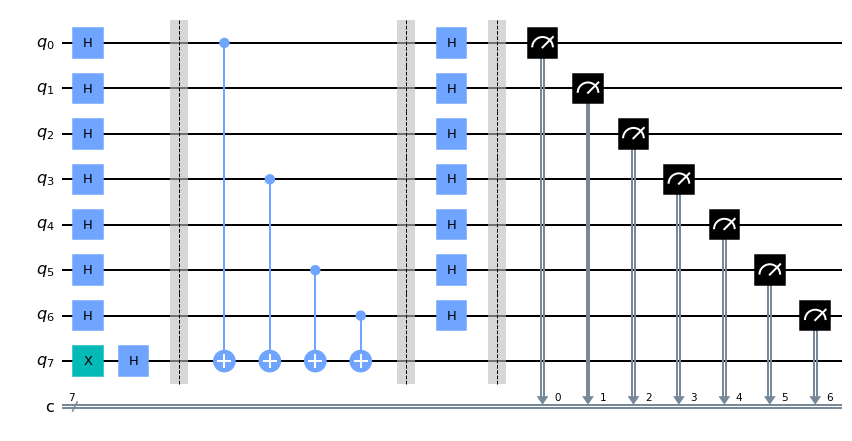

In [4]:
circuit.draw(output='mpl')

In [5]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
count = result.get_counts()
print(count)

{'1101001': 1}
